# Importing libraries and dataframe

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#import cleaned anglers dataframe
df_anglers = pd.read_csv(r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers\02 Data\Prepared\chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv', index_col=False)
path = r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers'
df_anglers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv'), index_col=False)

# Quick review and possible cleaning

In [4]:
df_anglers.head()

,Unnamed: 0,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,5,Catch and Keep,chinook salmon,Lake Huron,HU,lk_huron,9/18/1997 14:35,9/18/1997,14:35:00,1997,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
1,8,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/25/1997 13:00,7/25/1997,13:00:00,1997,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
2,9,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/20/1997 13:55,7/20/1997,13:55:00,1997,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
3,10,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/24/1997 13:30,7/24/1997,13:30:00,1997,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
4,11,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,8/31/1997 8:00,8/31/1997,8:00:00,1997,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low


In [5]:
#dropping unnamed column
df_anglers = df_anglers.drop('Unnamed: 0', axis=1)

In [6]:
df_anglers.head()

,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,weight lbs,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,Catch and Keep,chinook salmon,Lake Huron,HU,lk_huron,9/18/1997 14:35,9/18/1997,14:35:00,1997,28.75,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
1,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/25/1997 13:00,7/25/1997,13:00:00,1997,38.38,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
2,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/20/1997 13:55,7/20/1997,13:55:00,1997,29.50,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
3,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,7/24/1997 13:30,7/24/1997,13:30:00,1997,25.50,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
4,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,8/31/1997 8:00,8/31/1997,8:00:00,1997,22.81,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low


In [7]:
df_anglers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 2747 non-null   object 
 1   species                  2747 non-null   object 
 2   waterbody                2747 non-null   object 
 3   lake                     2747 non-null   object 
 4   merge                    2747 non-null   object 
 5   datetime                 2747 non-null   object 
 6   date caught              2747 non-null   object 
 7   time caught              2747 non-null   object 
 8   year                     2747 non-null   int64  
 9   weight lbs               2747 non-null   float64
 10  length in                2747 non-null   float64
 11  method                   2747 non-null   object 
 12  bait                     2747 non-null   object 
 13  time hour caught         2747 non-null   int64  
 14  state minimum length in 

In [8]:
df_anglers.shape

(2747, 32)

In [9]:
#null values
df_anglers.isnull().sum()

category                   0
species                    0
waterbody                  0
lake                       0
merge                      0
datetime                   0
date caught                0
time caught                0
year                       0
weight lbs                 0
length in                  0
method                     0
bait                       0
time hour caught           0
state minimum length in    0
number_stocked             0
Average of CAL_Num/m3      0
Average of CALIM_Num/m3    0
Average of CYC_Num/m3      0
Average of CYCIM_Num/m3    0
Average of DAP_Num/m3      0
Average of NDAP_Num/m3     0
Average of PRED_Num/m3     0
stocked_category           0
PRED_category              0
CAL_category               0
CALIM_category             0
CALIM_category2            0
CYC_category               0
CYCIM_category             0
DAP_category               0
NDAP_category              0
dtype: int64

In [10]:
df_anglers.duplicated().sum()

0

# dataframe imported as expected: exact number of records, no missing values and no duplicated rows

# Data prep for regression analysis

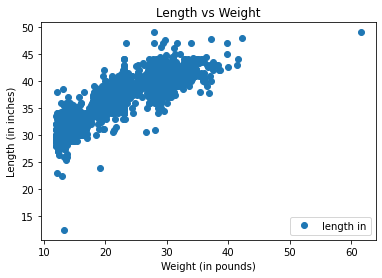

In [11]:
#I already know there is a relationship between length and weight
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_anglers.plot(x = 'weight lbs', y='length in',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length vs Weight')  
plt.xlabel('Weight (in pounds)')  
plt.ylabel('Length (in inches)')  
plt.show()

#dependent y: length is the dependent variable; independent X: weight is the independent variable

#as length increased, weight also increases

In [12]:
#reshape the variables into numpy arrays
X = df_anglers['weight lbs'].values.reshape(-1,1)
y = df_anglers ['length in'].values.reshape (-1,1)

In [13]:
# see x
X

array([[28.75],
       [38.38],
       [29.5 ],
       ...,
       [22.98],
       [29.45],
       [29.45]])

In [14]:
# see y
y

array([[40.  ],
       [43.  ],
       [41.  ],
       ...,
       [35.  ],
       [40.38],
       [40.88]])

In [15]:
#split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

# Regression analysis

In [16]:
#create a regression object
regression = LinearRegression() #this is the regression object we will fit on the training set

In [17]:
#fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

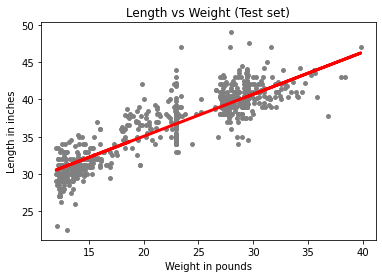

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Weight (Test set)')
plot_test.xlabel('Weight in pounds')
plot_test.ylabel('Length in inches')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.56323547]]
Mean squared error:  3.8197331394284397
R2 score:  0.8082168158874335


#The mean squared error is small, so the values may be a small distance from the line. The R2 score can be interpretted as 81%. This is a good fit.

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,42.00,40.374498
1,42.00,40.374498
2,40.13,40.374498
3,40.00,40.374498
4,42.38,42.711926
5,38.00,39.062160
6,33.00,30.900878
7,40.30,39.062160
8,34.50,33.993041
9,41.38,42.092367


#the actual length compared to the predicted length in the regression model

# Now to compare how the regression fits the training set

In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.56323547]]
Mean squared error:  3.587597364437701
R2 score:  0.8048480102327245


#the result is pretty darn similar

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,29.25,31.024790
1,36.00,36.730365
2,39.50,39.732410
3,41.00,42.058573
4,39.50,40.064719
5,43.00,40.374498
6,43.00,43.078029
7,31.00,31.002260
8,37.50,38.994572
9,41.50,42.092367
